# Loading word embeddings

In [84]:
import io
import numpy as np

In [85]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [86]:
src_path = '/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/t3hoh3n429/vectors-en.txt'
tgt_path = '/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/t3hoh3n429/vectors-zh.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
print("Loaded %i lines from src_embeddings." % len(src_embeddings))
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)
print("Loaded %i lines from tgt_embeddings." % len(tgt_embeddings))

Loaded 1833 lines from src_embeddings.
Loaded 1833 lines from tgt_embeddings.


In [87]:
import datetime

def load_sent(filepath, number_sample):
    sentences = []
    with io.open(filepath, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        for i, line in enumerate(f):
            sentences.append(line[:-1])
            if i == number_sample - 1: #sample lines
                break;
    print(str(datetime.datetime.now()) + ": Loaded %i lines " % len(sentences) + "from %s." % filepath)
    return sentences, i+1

In [88]:
# Import our mixed-up sentence file
number_sample = 1000

mix_short_eng, num_mix_short_eng = load_sent("./data/mix_short_eng", number_sample*4)
mix_short_chi, num_mix_short_chi = load_sent("./data/mix_short_chi", number_sample*4)

mix_long_eng, num_mix_long_eng = load_sent("./data/mix_long_eng", number_sample*4)
mix_long_chi, num_mix_long_chi = load_sent("./data/mix_long_chi", number_sample*4)

2019-07-07 21:54:24.768413: Loaded 1968 lines from ./data/mix_short_eng.
2019-07-07 21:54:24.770655: Loaded 1968 lines from ./data/mix_short_chi.
2019-07-07 21:54:24.775328: Loaded 1852 lines from ./data/mix_long_eng.
2019-07-07 21:54:24.779133: Loaded 1852 lines from ./data/mix_long_chi.


In [89]:
# find original data records
orig_src_id = [i for i, item in enumerate(src_word2id.keys()) if item in set(mix_short_eng)] 
orig_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item in set(mix_short_chi)]
orig_id = list(set(orig_src_id) & set(orig_tgt_id))

In [77]:
num = int(num_mix_short_chi/4)
# find original records
orig_src_id = [i for i, item in enumerate(src_word2id.keys()) if item in set(mix_short_eng[0:(num-1)])] 
orig_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item in set(mix_short_chi[0:(num-1)])]
orig_id = list(set(orig_src_id) & set(orig_tgt_id))

In [78]:
orig_id

[]

In [100]:
def find_rec(eng, chi, src_word2id, tgt_word2id, num_vec):
    num = int(num_vec/4)
    # find original records
    orig_src_id = [i for i, item in enumerate(src_word2id.keys()) if item in set(eng[0:(num-1)])] 
    orig_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item in set(chi[0:(num-1)])]
    orig_id = list(set(orig_src_id) & set(orig_tgt_id))

    # find undertranslation records
    under_src_id = [i for i, item in enumerate(src_word2id.keys()) if item not in set(eng[num:(2*num-1)])] 
    under_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item not in set(chi[num:(2*num-1)])]
    under_id = list(set(under_src_id + under_tgt_id))

    # find overtranslation records
    over_src_id = [i for i, item in enumerate(src_word2id.keys()) if item not in set(eng[2*num:(3*num-1)])] 
    over_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item not in set(chi[2*num:(3*num-1)])]
    over_id = list(set(over_src_id + over_tgt_id))

    # find mistranslation records 
    mis_src_id = [i for i, item in enumerate(src_word2id.keys()) if item not in set(eng[3*num:(4*num-1)])] 
    mis_tgt_id = [i for i, item in enumerate(tgt_word2id.keys()) if item not in set(chi[3*num:(4*num-1)])]
    mis_id = list(set(mis_src_id + mis_tgt_id))
    
    return orig_id, under_id, over_id, mis_id

In [101]:
short_orig_id, short_under_id, short_over_id, short_mis_id = find_rec(mix_short_eng, mix_short_chi, src_word2id, tgt_word2id, num_mix_short_chi)
long_orig_id, long_under_id, long_over_id, long_mis_id = find_rec(mix_long_eng, mix_long_chi, src_word2id, tgt_word2id, num_mix_long_chi)

In [102]:
# calculate distance

distance = []
srcword2distance = {}
tgtword2distance = {}

print('----> manually check if the threshold makes sense <----\n\n')
for i in range(min(len(src_embeddings), len(tgt_embeddings))):
    distance.append(np.linalg.norm(src_embeddings[i]-tgt_embeddings[i]))
    srcword2distance[src_id2word[i]] = distance[i]
    tgtword2distance[tgt_id2word[i]] = distance[i]
    if distance[i] > 1.2: # manually check if the threshold makes sense
        print(src_id2word[i])
        print(tgt_id2word[i]+'\n')

----> manually check if the threshold makes sense <----


Stock_8198_)
(_Code_:



In [103]:
print("Loaded %i pairs from distance." % len(distance))

Loaded 1833 pairs from distance.


In [104]:
def filter_rec(src_embeddings, tgt_embeddings, distance, rec_id):
    # find records
    filt_distance = []
    for i, line in enumerate(rec_id):
        if line < min(len(src_embeddings), len(tgt_embeddings), len(distance)): #???
            filt_distance.append(distance[line])
            print(src_id2word[line])
            print(tgt_id2word[line]+'\n')
    return filt_distance

In [105]:
print('\n----> filter out original translation <----\n')
short_orig_dis = filter_rec(src_embeddings, tgt_embeddings, distance, short_orig_id)
print('\n----> filter out undertranslation <----\n')
short_under_dis = filter_rec(src_embeddings, tgt_embeddings, distance, short_under_id)
print('\n----> filter out overtranslation <----\n')
short_over_dis = filter_rec(src_embeddings, tgt_embeddings, distance, short_over_id)
print('\n----> filter out mistranslation <----\n')
short_mis_dis = filter_rec(src_embeddings, tgt_embeddings, distance, short_mis_id)


----> filter out original translation <----

(_incorporated_in_the_Cayman_Islands_with_limited_liability_)
(_incorporated_in_the_Cayman_Islands_with_limited_liability_)

(_Stock_code_:_974_)
(_Stock_code_:_974_)

the_Board_announces_the_following_re-designation_of_Directors_with_effect_from_13_September_2017_:
the_Board_announces_the_following_re-designation_of_Directors_with_effect_from_13_September_2017_:

(_1_)_Mr._Wu_Limin_,_an_executive_Director_,_will_be_re-designated_as_a_non-executive_Director_;_and
(_1_)_Mr._Wu_Limin_,_an_executive_Director_,_will_be_re-designated_as_a_non-executive_Director_;_and

(_2_)_Mr._Han_Wei_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.
(_2_)_Mr._Han_Wei_,_a_non-executive_Director_,_will_be_re-designated_as_an_executive_Director_.

appointment_OF_chief_EXECUTIVE_OFFICER_,_chief_FINANCIAL_OFFICER_AND_chief_innovation_AND_INVESTMENT_OFFICER
appointment_OF_chief_EXECUTIVE_OFFICER_,_chief_FINANCIAL_OFFICER_AND_chief_innovat

(_(_incorporated_incorporated_in_Bermuda_with_limited_limited_liability_)
(_incorporated_in_in_in_Bermuda_with_limited_liability_)_)

(_(_incorporated_incorporated_incorporated_in_Bermuda_with_limited_liability_)
(_incorporated_incorporated_in_Bermuda_Bermuda_with_limited_limited_liability_)

(_Stock_Stock_Stock_Code_:_:_645_)
(_Stock_Code_:_:_:_645_645_)

resignation_OF_OF_EXECUTIVE_EXECUTIVE_EXECUTIVE_Director
resignation_OF_OF_EXECUTIVE_Director_Director_Director

resignation_resignation_resignation_OF_EXECUTIVE_EXECUTIVE_Director
resignation_resignation_OF_EXECUTIVE_EXECUTIVE_Director_Director

the_Board_would_like_to_express_its_its_sincere_gratitude_gratitude_to_Mr._Ran_for_his_valuable_contributions_to_the_Company_during_during_their_tenure_of_service_.
the_Board_would_like_to_express_express_its_sincere_gratitude_gratitude_to_Mr._Ran_for_his_valuable_contributions_to_the_Company_during_their_tenure_tenure_of_service_.

by_by_by_Order_of_of_the_Board
by_by_Order_Order_of_the_the

Wong_Mr._Raymond

Mr._Raymond_Wong_is_subject_to_reelection_at_the_annual_general_meeting_of_the_Company_in_accordance_with_the_articles_of_association_of_the_Company_.
Mr._Raymond_Wong_is_subject_to_reelection_at_the_annual_general_meeting_of_the_Company_in_accordance_with_the_articles_of_association_of_the_Company_.

Mr._Tang_is_subject_to_reelection_at_the_annual_general_meeting_of_the_Company_in_accordance_with_the_articles_of_association_of_the_Company_.
Mr._Tang_is_subject_to_reelection_at_the_annual_general_meeting_of_the_Company_in_accordance_with_the_articles_of_association_of_the_Company_.

(_2_)_resignation_OF_DIRECTORS
(_2_)_resignation_OF_DIRECTORS

Mr._Cheung_has_resigned_as_a_non-executive_Director_due_to_the_change_of_controlling_Shareholder_and_management_;
Mr._Cheung_has_resigned_as_a_non-executive_Director_due_to_the_change_of_controlling_Shareholder_and_management_;

reasons_for_the_resignation_of_Directors
reasons_for_the_resignation_of_Directors

(_3_)_CHANGE_OF_c

PROCESS_,_AND_,_authorised_FINANCIAL_agent_OF_representative_COMPANY_SECRETARY_change_controller
FINANCIAL_authorised_OF_agent_change_SECRETARY_AND_representative_PROCESS_,_,_controller_COMPANY

AND_OF_change_representative_controller_SECRETARY_COMPANY_FINANCIAL_,_PROCESS_authorised_agent_,
controller_PROCESS_COMPANY_FINANCIAL_change_SECRETARY_authorised_,_OF_agent_AND_representative_,

set_details_biographical_:_out_below_Mr._Ho_of_are_brief
:_Mr._below_biographical_are_of_set_Ho_brief_out_details

Yiu_Sum_Ho_Mr.
Yiu_Ho_Sum_Mr.

has_accountancy_in_Governance_’_in_’_degree_._he_a_and_a_in_Kong_bachelor_s_Corporate_Polytechnic_s_Hong_master_University_degree
Hong_a_he_._Polytechnic_s_a_accountancy_and_’_in_degree_has_bachelor_University_Governance_master_in_’_degree_Corporate_in_s_Kong

management_,_experience_Ho_listed_financial_of_extensive_auditing_has_company_Mr._secretarial_in_companies_work_._and
and_listed_experience_in_financial_,_Ho_extensive_work_has_secretarial_of_companies_.

change_change_OF_DIRECTORS_DIRECTORS_DIRECTORS
change_OF_OF_DIRECTORS_DIRECTORS_DIRECTORS

change_OF_DIRECTORS_DIRECTORS_DIRECTORS_DIRECTORS
change_OF_DIRECTORS_DIRECTORS_DIRECTORS_DIRECTORS

the_Board_announces_that_with_effect_from_the_close_of_the_AGM_on_8_May_May_May_2017_2017_:
the_Board_announces_that_with_effect_from_the_the_close_of_the_AGM_on_8_May_May_May_2017_:

a_._Mr._Mr._Wang_Wang_Linhua_and_Mr._Wang_Yong_Gui_have_resigned_as_the_executive_Directors_Directors_;
a_._Mr._Wang_Linhua_and_Mr._Wang_Yong_Yong_Gui_have_resigned_resigned_as_as_the_executive_Directors_;

b_._Mr._Qi_Jinsong_Jinsong_Jinsong_,_Mr._Mr._Chen_Ping_,_Mr._Guan_Zilong_and_Mr._Xu_Jianfeng_have_been_appointed_as_the_executive_Directors_;
b_._Mr._Qi_Jinsong_,_Mr._Chen_Chen_Ping_Ping_,_Mr._Guan_Zilong_and_Mr._Xu_Jianfeng_have_been_appointed_as_the_executive_Directors_Directors_;

c_._Mr._Zhang_De_Xin_,_Mr._Cai_Cai_Xiao_Xiao_Fu_and_Mr._Gu_Gu_Yu_Lin_have_resigned_as_the_independent_non-executive_Directors_;_and


In [106]:
import matplotlib.pyplot as plt

def plot_pic(orig_id, under_id, over_id, mis_id):
    plt.style.use('seaborn-deep')
    bins = np.linspace(0, 2)

    plt.hist([orig_id, under_id, over_id, mis_id], bins, label=['original translation', 'undertranslation', 'overtranslation', 'mistranslation'])
    plt.legend(loc='upper right')
    plt.savefig(src_path[:-14]+"plot.png")

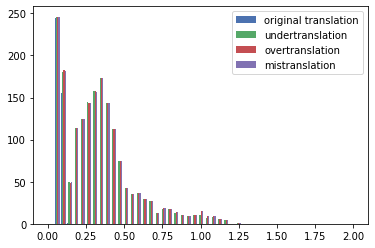

In [107]:
plot_pic(short_orig_dis, short_under_dis, short_over_dis, short_mis_dis)

In [10]:
# filter out GOOD translation
orig_distance = []

print('----> filter out GOOD translation <----\n\n')
for i, line in enumerate(orig_id):
    if line < min(len(src_embeddings), len(tgt_embeddings)): #???
        orig_distance.append(distance[line])
        print(src_id2word[line])
        print(tgt_id2word[line]+'\n')

----> filter out GOOD translation <----




In [11]:
print("Loaded %i lines from orig_distance." % len(orig_distance))

Loaded 0 lines from orig_distance.


In [12]:
# filter out BAD translation
arti_distance = []

print('\n'+'----> filter out BAD translation <----\n\n')
for i, line in enumerate(arti_id):
    if line < min(len(src_embeddings), len(tgt_embeddings), len(distance)): #???
        arti_distance.append(distance[line])
        print(src_id2word[line])
        print(tgt_id2word[line]+'\n')


----> filter out BAD translation <----


@0
(於開曼群島註冊成立之有限公司)

(incorporatedintheCaymanIslandswithlimitedliability)
（股份代號：974)

(Stockcode:974)
董事調任

re-designationOFDIRECTORS
董事會宣佈，下列董事的調任將自2017年9月13日起生效：

theBoardannouncesthefollowingre-designationofDirectorswitheffectfrom13September2017:
(1)執行董事武利民先生將調任為非執行董事；及

(1)Mr.WuLimin,anexecutiveDirector,willbere-designatedasanon-executiveDirector;and
(2)非執行董事韓瑋先生將調任為執行董事。

(2)Mr.HanWei,anon-executiveDirector,willbere-designatedasanexecutiveDirector.
委任行政總裁、首席財務總監及創投總監

appointmentOFchiefEXECUTIVEOFFICER,chiefFINANCIALOFFICERANDchiefinnovationANDINVESTMENTOFFICER
董事會宣佈，自2017年9月13日起：

theBoardannouncesthatwitheffectfrom13September2017:
(1)執行董事李仲煦先生已獲委任為本公司行政總裁；

(1)Mr.LiZhongxu,anexecutiveDirector,hasbeenappointedasthechiefexecutiveofficeroftheCompany;
(3)馮恒源先生已獲委任為本公司創投總監。

(3)Mr.FengHengyuanhasbeenappointedasthechiefinnovationandinvestmentofficeroftheCompany.
審核委員會組成之變更

changeOFcompositionOFTHEAUDITCOMMITTEE
(1)執行董事武利民先生（「武先生」）將調任為非執行董事；及


In [13]:
print("Loaded %i lines from arti_distance." % len(arti_distance))

Loaded 220 lines from arti_distance.


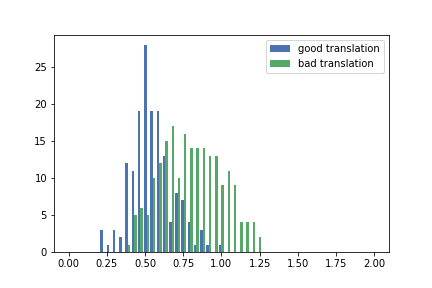

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/lz3fxcd6vp/plot.png

INFO - 06/19/19 13:37:25 - 0:00:00 - ============ Initialized logger ============
INFO - 06/19/19 13:37:25 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: False
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                              

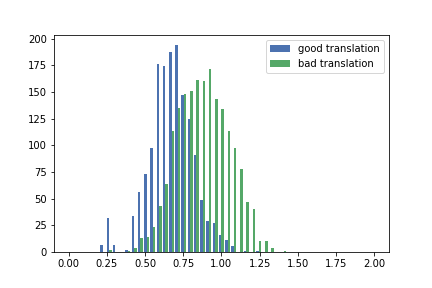

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/doa3ib8k7k/plot.png

INFO - 06/26/19 15:25:40 - 0:00:00 - ============ Initialized logger ============
INFO - 06/26/19 15:25:40 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

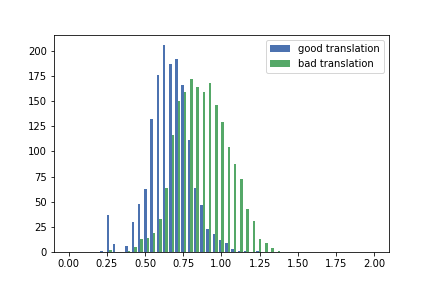

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/idfx3f03jf/plot.png

INFO - 06/26/19 15:32:19 - 0:00:00 - ============ Initialized logger ============
INFO - 06/26/19 15:32:19 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

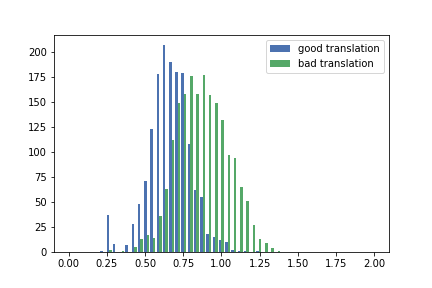

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/r3l2c34wcg/plot.png

INFO - 06/26/19 14:44:52 - 0:00:00 - ============ Initialized logger ============
INFO - 06/26/19 14:44:52 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

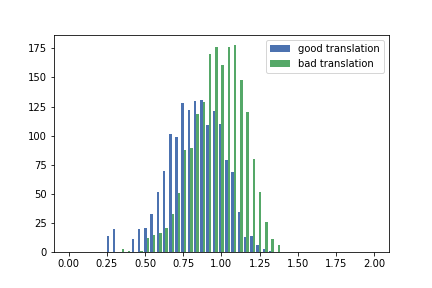

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/g6p4j43ggm/plot.png

INFO - 06/25/19 12:39:55 - 0:00:00 - ============ Initialized logger ============
INFO - 06/25/19 12:39:55 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

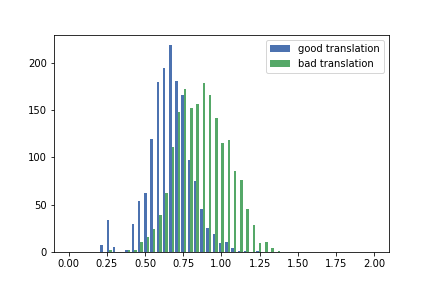

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/6u5jdjled1/plot.png

INFO - 06/26/19 15:36:33 - 0:00:00 - ============ Initialized logger ============
INFO - 06/26/19 15:36:33 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

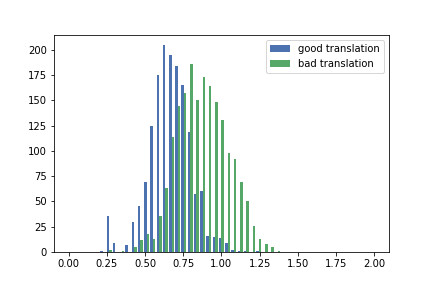

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/1tbmjvdi1j/plot.png

INFO - 06/26/19 15:30:14 - 0:00:00 - ============ Initialized logger ============
INFO - 06/26/19 15:30:14 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

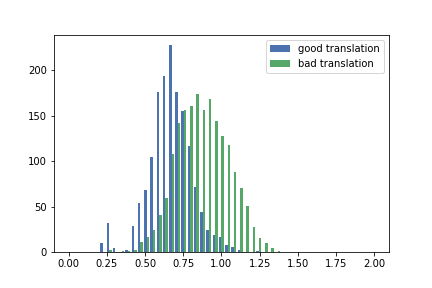

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/0av4usb0m8/plot.png

INFO - 06/26/19 15:34:22 - 0:00:00 - ============ Initialized logger ============
INFO - 06/26/19 15:34:22 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                               

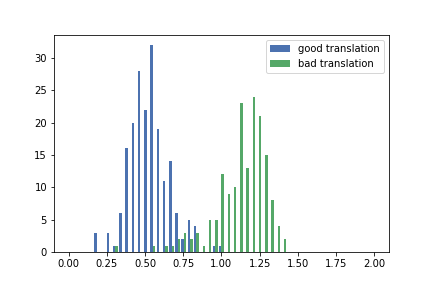

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/zn4rhg9ogh/plot.png

INFO - 06/18/19 21:13:25 - 0:00:00 - ============ Initialized logger ============
INFO - 06/18/19 21:13:25 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: False
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                              

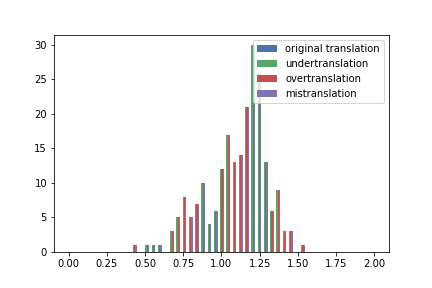

/Users/jadisy/Documents/GitHub/MUSE/dumped/debug/2ddjsabryp/plot.png

INFO - 06/13/19 21:02:10 - 0:00:00 - ============ Initialized logger ============
INFO - 06/13/19 21:02:10 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: False
                                     dico_build: S2T
                                     dico_eval: 
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                              

In [60]:
import os
from IPython.display import Image, display
listOfImageNames = []
listOfTrainLogs = []

for root, dirs, files in os.walk(src_path[:-25]):
    for name in files:
        if name.endswith(".png"):
            listOfImageNames.append(str(root)+'/'+str(name))
        if name.endswith(".log"):
            listOfTrainLogs.append(str(root)+'/'+str(name))

for i, imageName in enumerate(listOfImageNames):
    display(Image(filename=imageName))
    print(imageName+'\n')
    f = open(listOfTrainLogs[i], "r")
    print (f.read())

# Get nearest neighbors

In [ ]:
# get_nn
K = min(len(src_embeddings), len(tgt_embeddings))
word2id = {v: k for k, v in src_id2word.items()}
word_emb = src_embeddings[word2id[src_id2word[4]]]
scores = (tgt_embeddings / np.linalg.norm(tgt_embeddings, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
k_best = scores.argsort()[-K:][::-1]
for i, idx in enumerate(k_best):
    print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [ ]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [ ]:
# printing nearest neighbors in the source space
src_word = src_id2word[4]
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

In [ ]:
# printing nearest neighbors in the target space
src_word = src_id2word[4]
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

# Visualize multilingual embeddings

In [ ]:
# # from sklearn.decomposition import PCA
# pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
# pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
# print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

In [ ]:
# import matplotlib.pyplot as plt


# def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

#     Y = []
#     word_labels = []
#     for sw in src_words:
#         Y.append(src_emb[src_word2id[sw]])
#         word_labels.append(sw)
#     for tw in tgt_words:
#         Y.append(tgt_emb[tgt_word2id[tw]])
#         word_labels.append(tw)

#     # find tsne coords for 2 dimensions
#     Y = pca.transform(Y)
#     x_coords = Y[:, 0]
#     y_coords = Y[:, 1]

#     # display scatter plot
#     plt.figure(figsize=(10, 8), dpi=80)
#     plt.scatter(x_coords, y_coords, marker='x')

#     for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
#         color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
#         plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
#                      color=color, weight='bold')

#     plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
#     plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
#     plt.title('Visualization of the multilingual word embedding space')

#     plt.show()

In [ ]:
# # get 5 random input words
# src_words = ['university', 'love', 'history', 'tennis', 'research', 'conference']
# tgt_words = ['universidad', 'amor', 'historia', u'tenis',  u'investigación', 'conferencia']

# # assert words in dictionaries
# for sw in src_words:
#     assert sw in src_word2id, '"%s" not in source dictionary' % sw
# for tw in tgt_words:
#     assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

# plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)